## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---

> __In the paper we used the actual, rather than synthetic demand. We used albatross Dutch datasets.__

> __You can see how transform your macroscopic OD matrices into the ExMAS microscopic trip request in `ExMAS_utils.load_albatross_csv` or contact me__


### Synthetic demand generation

-----

We generate `params.nP` trip requests (`inData.requests`).

Requests are defined through:
* origin (node of `inData.G` graph)
* destinations (node of `inData.G` graph)
* treq (requested departure time)

----

* origins are drawn from random distribution `math.exp(_params.demand_structure.origins_dispertion*x))`, where `x` is distance from `inData.networkStats.center` (in meters)
* destinations similarly, yet with `_params.demand_structure.destinations_dispertion`
* treq is drawn from uniform distribution between $[t0-T/2,t0+T/2]$, where $t0$ is `params.t0` and $T$ is `params.simTime' (optionally normal distribution may be applied, but it seems impractical)

----

We use function `generate_demand` from `dataStructures.ipynb` to generate the demand

We visualize the demand with `plot_demand` from `utils/plot_utils.ipynb`

----

* `dist` of requerst is given im meters
* `ttrav` of request is either calculated as dist divided by `params.avg_speed` (in [m/s]) or estimated using real-time data (in general travel times shall be estimarted within current study using givwen assumption on trip time and speed).



In [1]:
import os
import pprint
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __load the default config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

### syntehtic demand parameterization

In [5]:
params.nP #number of passengers

200

In [6]:
params.city

'Delft, Netherlands'

In [7]:
params.simTime # demand simulation time [hours]

1

In [8]:
params.demand_structure.destinations_dispertion # controls how destinations are dispersed from center (see negative exponenetial decay function in ExMAS_utils.generate_demand)

-0.001

In [9]:
params.demand_structure.origins_dispertion # controls how origins are dispersed from center

-0.0003

In [10]:
pprint.pprint(params.demand_structure)

{'destinations_dispertion': -0.001,
 'origins_dispertion': -0.0003,
 'temporal_dispertion': 0.3,
 'temporal_distribution': 'uniform'}


2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [11]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [12]:
%load_ext autoreload
%autoreload 2

3. __generate trip requests__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [13]:
inData = ExMAS.utils.generate_demand(inData, params)

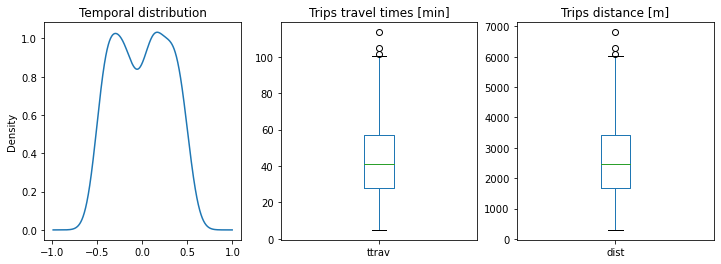

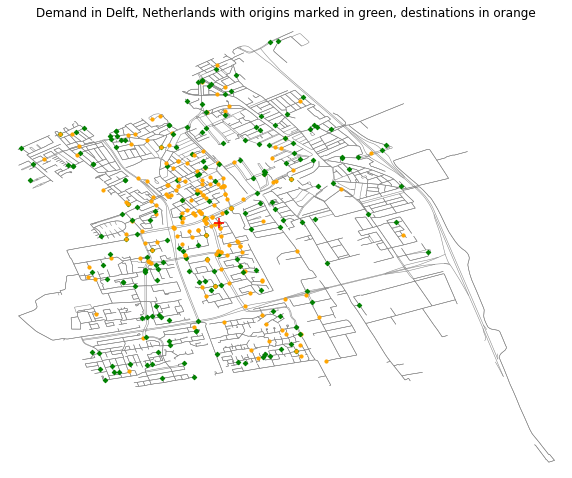

In [14]:
ExMAS.utils.plot_demand(inData, params)

<AxesSubplot:title={'center':'Trip distances'}, ylabel='Frequency'>

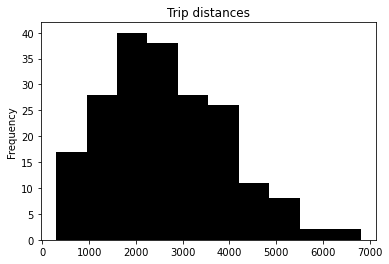

In [15]:
inData.requests.dist.plot(kind='hist',title='Trip distances',color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

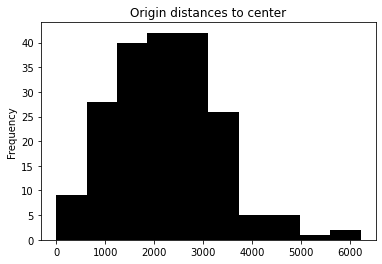

In [16]:
inData.skim[inData.stats['center']][inData.requests.origin].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

<AxesSubplot:title={'center':'Origin distances to center'}, ylabel='Frequency'>

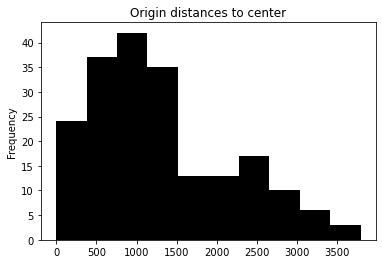

In [17]:
inData.skim[inData.stats['center']][inData.requests.destination].plot(kind='hist', 
                                                                 title='Origin distances to center',
                                                                 color='black')

##### store as geopandas csvgeorequests = ExMAS.utils.requests_to_geopandas(inData, filename = 'georequests.csv')

In [18]:
georequests = ExMAS.utils.requests_to_geopandas(inData, filename = 'ExMAS/spinoffs/MM/georequests.csv')

In [19]:
georequests.sample(5)

,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,Point_o,Point_d
73,1433963006,1393024904,2020-10-29 15:02:13,NaN,01:19:22,2020-10-29 16:21:35,NaN,4762,73,POINT (4.37071 51.99562),POINT (4.355431 51.9946442)
28,365993500,44796534,2020-10-29 15:09:58,NaN,00:58:12,2020-10-29 16:08:10,NaN,3492,28,POINT (4.35758 52.02279),POINT (4.355361 51.9995426)
198,1566353694,44819251,2020-10-29 14:42:10,NaN,00:56:13,2020-10-29 15:38:23,NaN,3373,198,POINT (4.34463 51.98076),POINT (4.3481819 52.0054461)
121,1435362475,44811247,2020-10-29 14:40:35,NaN,00:36:56,2020-10-29 15:17:31,NaN,2216,121,POINT (4.33500 52.01149),POINT (4.3497223 52.0028507)
85,1436427109,44840453,2020-10-29 14:33:13,NaN,00:29:13,2020-10-29 15:02:26,NaN,1753,85,POINT (4.33321 52.00968),POINT (4.348473 52.0092525)


---
(c) Rafał Kucharski, Delft, 2020